## TITANIC SURVIVAL PREDICATION

##### 1.Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
##### 2.The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

#IMPORTING LIBRARIES..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#LOADING DATA 
ds = pd.read_csv('titanic.csv')
#LOADING HEAD OF THE DATA
ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
#GETTING TO KNOW MORE ABOUT THE DATA(NULL VALUES, DATATYPE)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
#CALCULATING TOTAL NAN VALUES IN THE COLUMN
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# LOOKING INTO STATISTICAL INFO OF DATA
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
#LOOKING INTO FREQUENCY OF DATATYPES INTO THE COL
ds.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [35]:
#FILLING NAN VALUES WITH MEAN
ds.fillna(ds['Fare'].mean(), inplace=True)
ds.fillna(ds['Age'].mean(), inplace=True)
ds['Sex'] = ds['Sex'].map({'female':0,'male':1})
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None


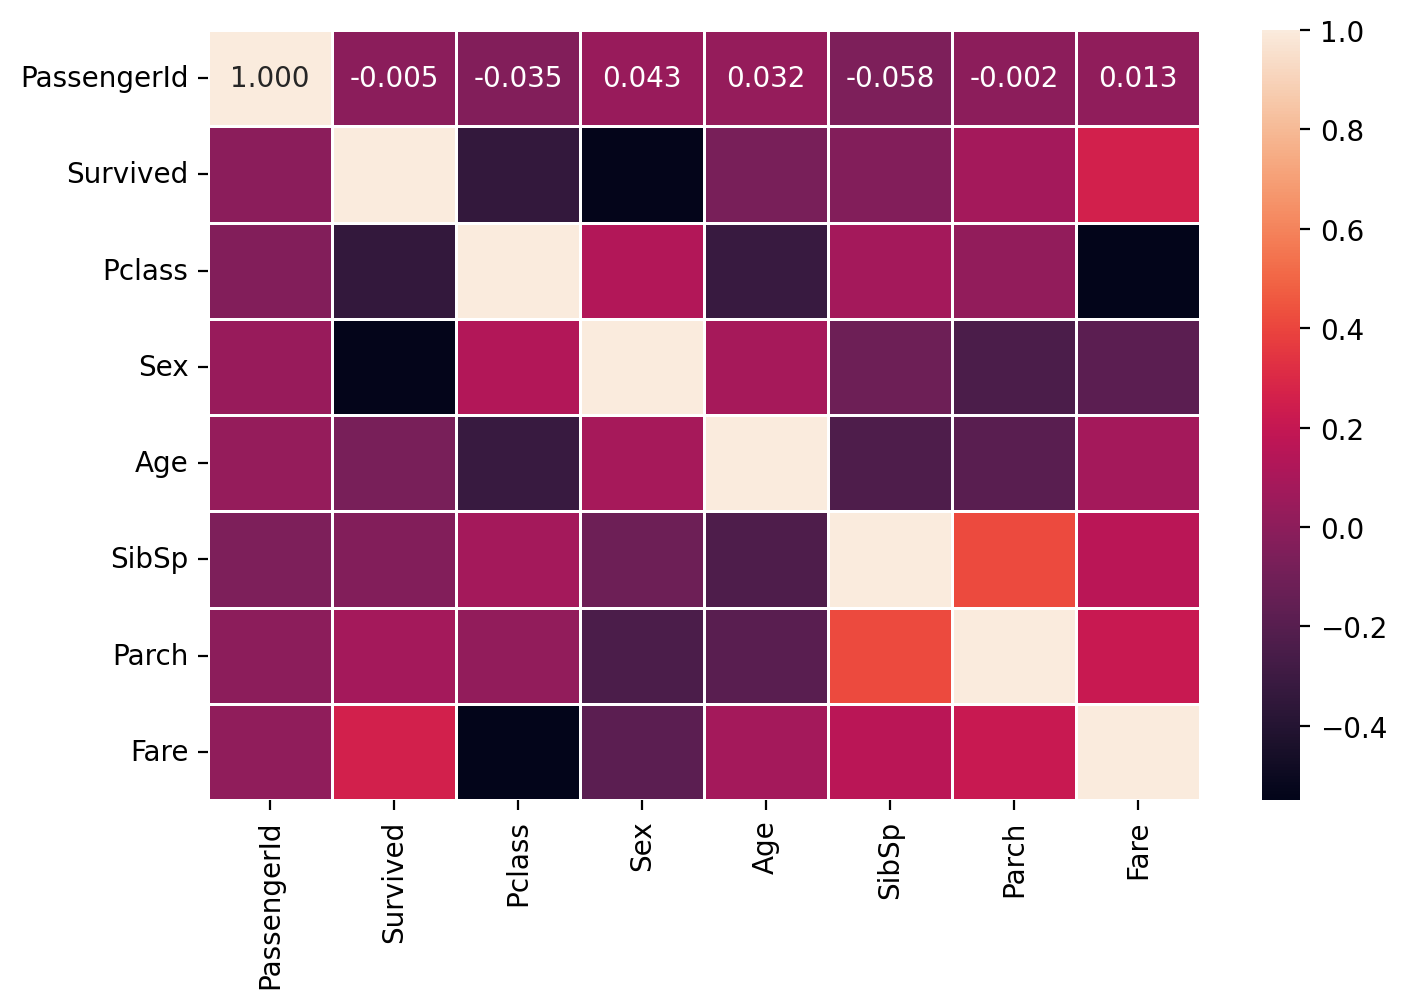

In [36]:
# to plot a heatmap from seaborn to show correlation of columns with each other.
corr = ds.corr(numeric_only=True)
plt.figure(figsize=(8,5), dpi = 200)
sns.heatmap(corr, annot=True, fmt=".3f", linewidth=.5)
plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

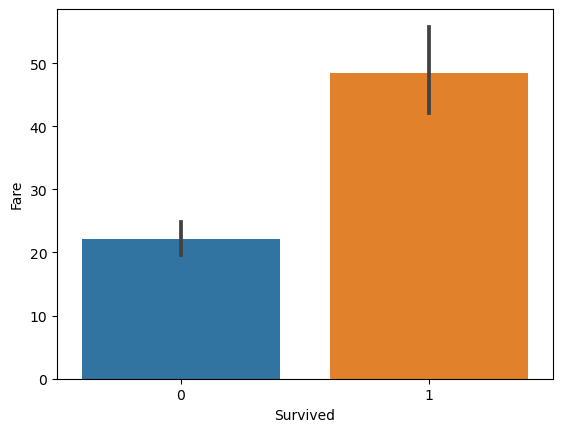

In [37]:
# people surviving on basis of fare
sns.barplot(ds, x= 'Survived', y = 'Fare')

<Axes: xlabel='Survived', ylabel='Age'>

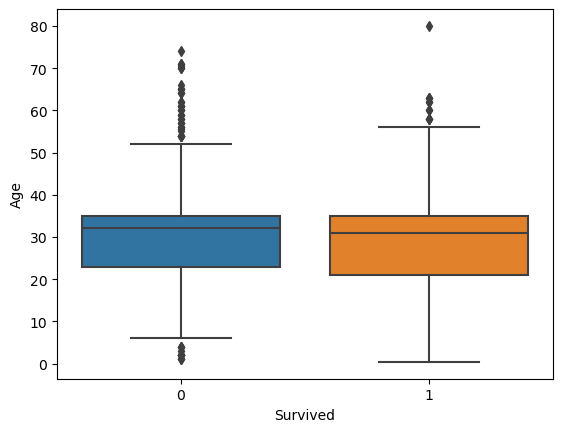

In [38]:
# people surviving on basis of age
sns.boxplot(ds, x= 'Survived', y = 'Age')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sex', ylabel='Count'>

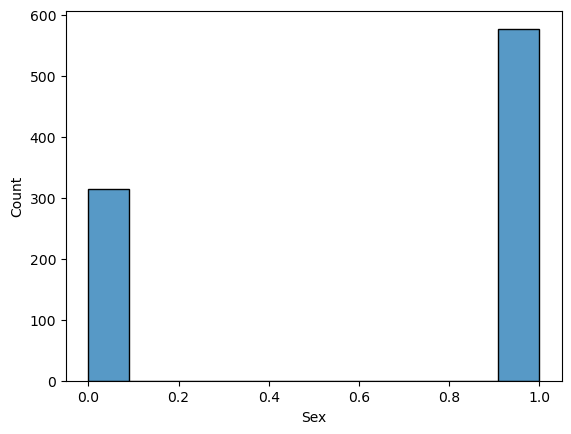

In [39]:
#PROPLE SURVIVED ON BASES OF SEX
sns.histplot(ds, x = 'Sex')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SibSp', ylabel='Count'>

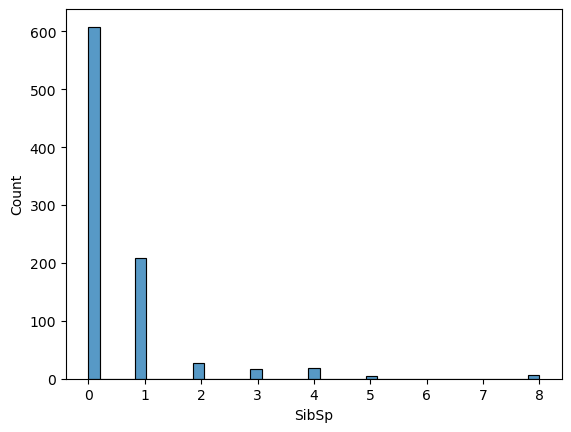

In [40]:
#PEOPLE SURVIVING ON BASIS OF SIBLING 
sns.histplot(ds, x = 'SibSp')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Parch', ylabel='Count'>

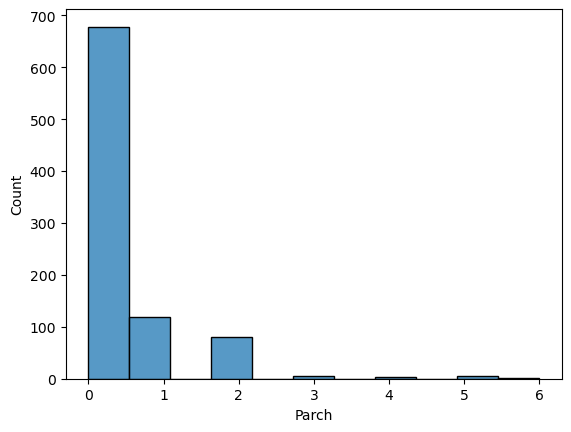

In [41]:
#PEOPLE SURVIVED ON BASES OF PARENTS
sns.histplot(ds, x = 'Parch')

In [42]:
#FOR COLUMN NAMES IN THE DATASET
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
# copying data such that original is not affected and selecting columns that are relevent

data = ds[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Fare']].copy(deep= True)
print(data)

     Survived  Pclass  Sex  SibSp  Parch        Age     Fare
0           0       3    1      1      0  22.000000   7.2500
1           1       1    0      1      0  38.000000  71.2833
2           1       3    0      0      0  26.000000   7.9250
3           1       1    0      1      0  35.000000  53.1000
4           0       3    1      0      0  35.000000   8.0500
..        ...     ...  ...    ...    ...        ...      ...
886         0       2    1      0      0  27.000000  13.0000
887         1       1    0      0      0  19.000000  30.0000
888         0       3    0      1      2  32.204208  23.4500
889         1       1    1      0      0  26.000000  30.0000
890         0       3    1      0      0  32.000000   7.7500

[891 rows x 7 columns]


In [44]:
## importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['Age','Pclass','Fare','Sex','SibSp','Parch']]
y = data['Survived']

In [45]:
# gives frequency of unique values in a column/s to find if data is balanced or imbalanced
data['Survived'].value_counts()
#the ration is 61.61%:38.38% so that can be considered as balance


Survived
0    549
1    342
Name: count, dtype: int64

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np


In [48]:
# importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
# KNeighbhors algorithm where we have kept value of k in a loop to get an optimum value with least misclassified data
missclassified=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kpred = knn.predict(x_test)
    missclassified.append((y_test != kpred).sum())
print(missclassified)

[80, 87, 83, 85, 83, 86, 82, 84, 80, 82, 78, 81, 81, 84, 81, 81, 79, 78, 76]


In [50]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
kpred = knn.predict(x_test)
kcm = confusion_matrix(y_test,kpred)
kacc = accuracy_score(y_test,kpred)
print(f'The confusion matrix is:\n{kcm}\nThe accuracy is: {round((kacc*100), 2)}%')

The confusion matrix is:
[[138  19]
 [ 67  44]]
The accuracy is: 67.91%


In [52]:
# Logistic Regression algorithm
lr = LogisticRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lcm = confusion_matrix(y_test,lpred)
lacc = accuracy_score(y_test,lpred)
print(f'The confusion matrix is:\n{lcm}\nThe accuracy is: {lacc*100}%')

The confusion matrix is:
[[138  19]
 [ 32  79]]
The accuracy is: 80.97014925373134%


In [53]:
# Decision Tree algorithm
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dpred = dtc.predict(x_test)
dcm = confusion_matrix(y_test,dpred)
dacc = accuracy_score(y_test,dpred)
print(f'The confusion matrix is:\n{dcm}\nThe accuracy is: {dacc*100}%')

The confusion matrix is:
[[128  29]
 [ 37  74]]
The accuracy is: 75.3731343283582%


In [54]:
# Random Forest algorithm
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rpred = rfc.predict(x_test)
rcm = confusion_matrix(y_test,rpred)
racc = accuracy_score(y_test,rpred)
print(f'The confusion matrix is:\n{rcm}\nThe accuracy is: {racc*100}%')

The confusion matrix is:
[[134  23]
 [ 35  76]]
The accuracy is: 78.35820895522389%


In [55]:
# Naives Bayes - Gaussian theorem algorithm
nb = GaussianNB()
nb.fit(x_train,y_train)
npred = nb.predict(x_test)
ncm = confusion_matrix(y_test,npred)
nacc = accuracy_score(y_test,npred)
print(f'The confusion matrix is:\n{ncm}\nThe accuracy is: {nacc*100}%')

The confusion matrix is:
[[130  27]
 [ 29  82]]
The accuracy is: 79.1044776119403%


In [56]:
# Scalar Vector Machine algorithm
svm = SVC(kernel='linear',random_state=12)
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
scm = confusion_matrix(y_test,spred)
sacc = accuracy_score(y_test,spred)
print(f'The confusion matrix is:\n{scm}\nThe accuracy is: {sacc*100}%')

The confusion matrix is:
[[134  23]
 [ 33  78]]
The accuracy is: 79.1044776119403%


###### NOTE:EXCEPT KNEIGHBOURS (WHICH IS 67.91%) REST ALL THE ALGORITHMS GAVE AROUND 79% ACCURACY BECAUSE OF THE DATA WHICH IS SLIGHT IMBALANCE  DUE TO ITS NATURE.